<a href="https://colab.research.google.com/github/YannMaa/traco_2024/blob/main/solution_yannis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup Packages

In [2]:
!pip install ultralytics
!pip install deep-sort-realtime
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

# Preprocessing

In [ ]:

# import os
# import cv2
# import pandas as pd
# import json
# import shutil

# # Funktion zum Extrahieren von Frames mit eindeutigen Namen
# def extract_frames(video_path, image_folder, video_id):
#     cap = cv2.VideoCapture(video_path)
#     frame_id = 0
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break
#         # Eindeutiger Bildname pro Video und Frame
#         image_path = os.path.join(image_folder, f"{video_id}_frame_{frame_id}.jpg")
#         cv2.imwrite(image_path, frame)
#         frame_id += 1
#     cap.release()
#     print(f"Frames aus {video_path} gespeichert unter {image_folder}")

# # Funktion zur Berechnung der normalisierten Bounding Box
# def convert_to_yolo_format(x, y, image_width, image_height):
#     width = 50
#     height = 50
#     x_center = x / image_width
#     y_center = y / image_height
#     width_norm = width / image_width
#     height_norm = height / image_height
#     return x_center, y_center, width_norm, height_norm

# # Verarbeitung einer CSV- und .traco-Datei für ein Video
# def process_files(csv_file, traco_file, image_folder, label_folder, video_id):
#     df = pd.read_csv(csv_file)
#     with open(traco_file, 'r') as f:
#         traco_data = json.load(f)

#     for i, row in df.iterrows():
#         frame_id = int(row['t'])
#         x, y = row['x'], row['y']
#         image_path = os.path.join(image_folder, f"{video_id}_frame_{frame_id}.jpg")
#         image = cv2.imread(image_path)
#         if image is None:
#             continue
#         image_height, image_width, _ = image.shape
#         x_center, y_center, width_norm, height_norm = convert_to_yolo_format(x, y, image_width, image_height)
#         label_file = os.path.join(label_folder, f"{video_id}_frame_{frame_id}.txt")
#         with open(label_file, 'a') as f:
#             f.write(f"0 {x_center} {y_center} {width_norm} {height_norm}\n")

#     for roi in traco_data['rois']:
#         frame_id = roi['z']
#         x, y = roi['pos']
#         image_path = os.path.join(image_folder, f"{video_id}_frame_{frame_id}.jpg")
#         image = cv2.imread(image_path)
#         if image is None:
#             continue
#         image_height, image_width, _ = image.shape
#         x_center, y_center, width_norm, height_norm = convert_to_yolo_format(x, y, image_width, image_height)
#         label_file = os.path.join(label_folder, f"{video_id}_frame_{frame_id}.txt")
#         with open(label_file, 'a') as f:
#             f.write(f"0 {x_center} {y_center} {width_norm} {height_norm}\n")

# # Hauptfunktion zur Verarbeitung ALLER Videos im Verzeichnis
# def process_all_training_data(folder_path):
#     image_folder = os.path.join(folder_path, 'images')
#     label_folder = os.path.join(folder_path, 'labels')

#     # Alte Inhalte löschen (optional, aber empfohlen)
#     for folder in [image_folder, label_folder]:
#         if os.path.exists(folder):
#             shutil.rmtree(folder)
#         os.makedirs(folder)

#     # Alle Videodateien im Ordner durchgehen
#     for filename in os.listdir(folder_path):
#         if filename.endswith('.mp4'):
#             video_path = os.path.join(folder_path, filename)
#             video_id = os.path.splitext(filename)[0]  # z. B. "training01"

#             csv_file = os.path.join(folder_path, f"{video_id}.csv")
#             traco_file = os.path.join(folder_path, f"{video_id}.traco")
#             if not os.path.exists(csv_file) or not os.path.exists(traco_file):
#                 print(f"Fehlende Dateien für {video_id}, überspringe...")
#                 continue

#             print(f"Verarbeite {video_id}...")
#             extract_frames(video_path, image_folder, video_id)
#             process_files(csv_file, traco_file, image_folder, label_folder, video_id)

# # STARTE den Prozess
# process_all_training_data('/content/drive/MyDrive/traco_2024/training')


Verarbeite training01...
Frames aus /content/drive/MyDrive/traco_2024/training/training01.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite training0100...
Frames aus /content/drive/MyDrive/traco_2024/training/training0100.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite training021...
Frames aus /content/drive/MyDrive/traco_2024/training/training021.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite training019...
Frames aus /content/drive/MyDrive/traco_2024/training/training019.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite training012...
Frames aus /content/drive/MyDrive/traco_2024/training/training012.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite training018...
Frames aus /content/drive/MyDrive/traco_2024/training/training018.mp4 gespeichert unter /content/drive/MyDrive/traco_2024/training/images
Verarbeite train

# Train & Validation Split

In [ ]:

# import os
# import random
# import shutil

# # Pfade definieren
# images_dir = "/content/drive/MyDrive/traco_2024/training/images"
# labels_dir = "/content/drive/MyDrive/traco_2024/training/labels"
# video_dir = "/content/drive/MyDrive/traco_2024/training"

# train_images_out = "/content/drive/MyDrive/traco_2024/training/model_training/images"
# train_labels_out = "/content/drive/MyDrive/traco_2024/training/model_training/labels"
# val_images_out = "/content/drive/MyDrive/traco_2024/training/model_validation/images"
# val_labels_out = "/content/drive/MyDrive/traco_2024/training/model_validation/labels"

# # Zielordner erstellen, wenn sie noch nicht existieren
# for d in [train_images_out, train_labels_out, val_images_out, val_labels_out]:
#     os.makedirs(d, exist_ok=True)

# # Alle Video-Dateien auflisten (angenommen: es gibt Bild- und Label-Dateien mit den gleichen Namen wie die Videos)
# video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]  # Liste der Video-Dateien

# # Video-IDs extrahieren und sicherstellen, dass wir den Unterstrich anhängen
# video_ids = list(set(os.path.splitext(f)[0] for f in video_files))  # Video-IDs extrahieren

# # Füge '_' an jede ID an
# video_ids = [vid_id + '_' for vid_id in video_ids]  # Unterstrich zu jeder ID hinzufügen


# # Zufällig 20 Video-IDs auswählen
# random.shuffle(video_ids)
# selected_video_ids = video_ids[:20]

# print(f"Ausgewählte Video-IDs: {selected_video_ids}")

# # Für jedes ausgewählte Video die entsprechenden Bilder und Labels kopieren
# train_image_files = []
# train_label_files = []
# val_image_files = []
# val_label_files = []

# # Gehe durch jede ausgewählte Video-ID
# for video_id in selected_video_ids:
#     # Bild- und Label-Dateien für das Video finden
#     img_files = [f for f in os.listdir(images_dir) if f.startswith(video_id) and (f.endswith(".jpg") or f.endswith(".png"))]
#     label_files = [f for f in os.listdir(labels_dir) if f.startswith(video_id) and f.endswith(".txt")]

#     # Sicherstellen, dass wir genau 100 Bilder und 100 Labels haben
#     if len(img_files) != 101 or len(label_files) != 101:
#         print(f"Warnung: Für Video-ID {video_id} fehlen Bilder oder Labels!")
#         print(len(img_files))
#         print((len(label_files)))
#         continue

#     # Die Bild- und Label-Dateien nach der Reihenfolge sortieren
#     img_files.sort()
#     label_files.sort()

#     print(video_id)
#     print(img_files)
#     print(len(img_files[:101]))

#     # Slicing der ersten X Dateien für die Validierung (z. B. 20 Bilder/Labels für die Validierung)
#     val_image_files.extend(img_files)
#     val_label_files.extend(label_files)



# # Der Rest geht ins Training
# # Train-Dateien durch Subtraktion bestimmen
# all_image_files = set(os.listdir(images_dir))
# all_label_files = set(os.listdir(labels_dir))

# val_image_files_set = set(val_image_files)
# val_label_files_set = set(val_label_files)

# train_image_files = list(all_image_files - val_image_files_set)
# train_label_files = list(all_label_files - val_label_files_set)


# # Funktion zum Kopieren der Dateien in die Zielordner
# def copy_files(file_list, src_dir, dst_dir):
#     for file in file_list:
#         src_path = os.path.join(src_dir, file)
#         dst_path = os.path.join(dst_dir, file)

#         # Sicherstellen, dass die Datei existiert
#         if not os.path.exists(src_path):
#             print(f"Fehler: Datei nicht gefunden - {src_path}")
#             continue

#         shutil.copy(src_path, dst_path)

# # Kopiere die Bild- und Label-Dateien in den jeweiligen Ordner
# copy_files(train_image_files, images_dir, train_images_out)
# copy_files(train_label_files, labels_dir, train_labels_out)
# copy_files(val_image_files, images_dir, val_images_out)
# copy_files(val_label_files, labels_dir, val_labels_out)

# print(f"Trainingsset: {len(train_image_files)} Bilder, {len(train_label_files)} Labels")
# print(f"Validierungsset: {len(val_image_files)} Bilder, {len(val_label_files)} Labels")






Ausgewählte Video-IDs: ['training063_', 'training097_', 'training052_', 'training092_', 'training084_', 'training077_', 'training046_', 'training065_', 'training068_', 'training08_', 'training020_', 'training012_', 'training059_', 'training066_', 'training018_', 'training088_', 'training019_', 'training013_', 'training078_', 'training050_']
training063_
['training063_frame_0.jpg', 'training063_frame_1.jpg', 'training063_frame_10.jpg', 'training063_frame_100.jpg', 'training063_frame_11.jpg', 'training063_frame_12.jpg', 'training063_frame_13.jpg', 'training063_frame_14.jpg', 'training063_frame_15.jpg', 'training063_frame_16.jpg', 'training063_frame_17.jpg', 'training063_frame_18.jpg', 'training063_frame_19.jpg', 'training063_frame_2.jpg', 'training063_frame_20.jpg', 'training063_frame_21.jpg', 'training063_frame_22.jpg', 'training063_frame_23.jpg', 'training063_frame_24.jpg', 'training063_frame_25.jpg', 'training063_frame_26.jpg', 'training063_frame_27.jpg', 'training063_frame_28.jpg', '

# YAML File Creation

In [3]:
# create .yaml file

import yaml


train = '/content/drive/MyDrive/traco_2024/training/model_training/images'
# train_overfitting = '/content/drive/MyDrive/traco_2024/training/training_oneFrame/images'
val = '/content/drive/MyDrive/traco_2024/training/model_validation/images'

# Klassenbezeichner – nur 1 Klasse "hexbug"
names = {0: 'hexbug'}

# create YAML-Dictionary
dataset_yaml = {
    'train': train,
    # 'train': train_overfitting,
    'val': val,
    # 'val': train_overfitting,
    'nc': len(names),
    'names': list(names.values())
}

# save file
yaml_path = "/content/drive/MyDrive/traco_2024/training/dataset.yaml"
with open(yaml_path, 'w') as file:
    yaml.dump(dataset_yaml, file, sort_keys=False)

print(f"YAML-Datei wurde gespeichert unter: {yaml_path}")


YAML-Datei wurde gespeichert unter: /content/drive/MyDrive/traco_2024/training/dataset.yaml


In [13]:
import yaml
# for overiftting - testing

# Pfade zu den Trainings- und Validierungsordnern
train_overfitting = '/content/drive/MyDrive/traco_2024/training/training_oneFrame/images'

# Klassenbezeichner – nur 1 Klasse "hexbug"
names = {0: 'hexbug'}

# Erstelle das YAML-Dictionary für YOLOv8
dataset_yaml = {
    'path': '/content/drive/MyDrive/traco_2024/training/training_oneFrame',  # Basisordner, der `images` und `labels` enthält
    'train': 'images',  # Ordner mit den Trainingsbildern
    'val': 'images',    # Ordner mit den Validierungsbildern (hier gleich wie 'train' für Overfitting)
    'nc': len(names),   # Anzahl der Klassen (in diesem Fall 1)
    'names': list(names.values())  # List der Klassennamen (hier: ["hexbug"])
}

# Speichere die YAML-Datei
yaml_path = "/content/drive/MyDrive/traco_2024/training/dataset.yaml"
with open(yaml_path, 'w') as file:
    yaml.dump(dataset_yaml, file, sort_keys=False)

print(f"YAML-Datei wurde gespeichert unter: {yaml_path}")


YAML-Datei wurde gespeichert unter: /content/drive/MyDrive/traco_2024/training/dataset.yaml


# Remove Double Labels

In [ ]:
import os

# path to label dir
label_dir = "/content/drive/MyDrive/traco_2024/training/model_validation/labels"
# label_dir = "/content/drive/MyDrive/traco_2024/training/model_training/labels"

# iter over all txt files
for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(label_dir, filename)
        with open(file_path, "r") as f:
            lines = f.readlines()

        # remove double lines
        unique_lines = list(dict.fromkeys(lines))

        # overwrite with distinct signs
        with open(file_path, "w") as f:
            f.writelines(unique_lines)

print("✅ Duplikate entfernt.")



✔️ Fertig: 9386 doppelte Labels in 8067 Dateien entfernt.
✔️ Fertig: 2757 doppelte Labels in 2020 Dateien entfernt.


# Model Training - Yolov8n

In [34]:
from ultralytics import YOLO
import os
import torch

# load YOLOv8 Modell
model = YOLO("yolov8n.pt")

# traiing
# yaml filepath
dataset_yaml = "/content/drive/MyDrive/traco_2024/training/dataset.yaml"

# train model
print(f"CUDA verfügbar: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'Kein GPU vorhanden'}")

# Load pretrained Modell
model = YOLO("yolov8n.pt")

# train model
#btahc size
results = model.train(data=dataset_yaml, epochs=30, device=0, batch = 10)  # device=0 => GPU
best_model_path = model.ckpt_path  # Pfad zum besten Modell
print("Bestes Modell gespeichert unter:", best_model_path)

# copy to a dir
import shutil
shutil.copy(best_model_path, "/content/drive/MyDrive/traco_2024/yolov8_model_y.pt")



CUDA verfügbar: True
GPU Name: Tesla T4
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=10, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/traco_2024/training/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

train: Scanning /content/drive/MyDrive/traco_2024/training/training_oneFrame/labels... 97 images, 4 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:35<00:00,  2.84it/s]

train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_1.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_100.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_20.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_23.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_46.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_47.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_48.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/

val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 54.0±22.2 MB/s, size: 181.9 KB)


val: Scanning /content/drive/MyDrive/traco_2024/training/training_oneFrame/labels.cache... 97 images, 4 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]

train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_1.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_100.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_20.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_23.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_46.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_47.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/training/training_oneFrame/images/Kopie von training01_frame_48.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/traco_2024/

Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.39G      2.892      7.131      1.584          1        640: 100%|██████████| 11/11 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        101         97   0.000396      0.124   0.000226   8.19e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       1.4G      2.265      4.446       1.45          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.49it/s]

                   all        101         97     0.0029      0.907    0.00654    0.00334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.41G      1.899      2.928      1.215          2        640: 100%|██████████| 11/11 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]

                   all        101         97     0.0031      0.969    0.00771    0.00359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.41G      1.919      2.486      1.161          3        640: 100%|██████████| 11/11 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.45it/s]

                   all        101         97     0.0031      0.969    0.00675    0.00312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.41G      1.838      2.514      1.195          2        640: 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.60it/s]

                   all        101         97     0.0031      0.969     0.0106    0.00455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.41G       1.82      2.745      1.183          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all        101         97    0.00287      0.897     0.0282    0.00961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.41G      1.777      2.277      1.117          3        640: 100%|██████████| 11/11 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        101         97          1      0.421      0.822      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.41G      1.863      2.172      1.164          4        640: 100%|██████████| 11/11 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.51it/s]

                   all        101         97       0.81      0.441      0.613      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.41G      1.653      2.012      1.079          3        640: 100%|██████████| 11/11 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all        101         97      0.952      0.392      0.797      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.41G      1.671      1.893      1.113          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        101         97          1      0.486      0.857      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.41G      1.602      1.839      1.118          1        640: 100%|██████████| 11/11 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]


                   all        101         97      0.985      0.866      0.941      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.41G      1.532      1.643      1.062          1        640: 100%|██████████| 11/11 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        101         97      0.996      0.897      0.952      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.41G      1.565      1.621      1.036          3        640: 100%|██████████| 11/11 [00:01<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        101         97      0.957      0.919       0.97      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.41G      1.444      1.962     0.9583          0        640: 100%|██████████| 11/11 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        101         97      0.968      0.928      0.972      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.41G       1.42      1.623      1.036          1        640: 100%|██████████| 11/11 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all        101         97      0.996      0.938      0.975      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.41G      1.482      1.404      1.024          4        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]


                   all        101         97       0.98      0.948      0.974      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.41G      1.523       1.47      1.041          2        640: 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        101         97          1      0.954      0.979      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.41G      1.416      1.321      1.043          2        640: 100%|██████████| 11/11 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.66it/s]

                   all        101         97      0.997      0.959      0.982      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.41G      1.322      1.586     0.9595          0        640: 100%|██████████| 11/11 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]

                   all        101         97          1      0.956      0.977      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.42G      1.379      1.307      1.003          2        640: 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.20it/s]

                   all        101         97      0.988      0.959      0.977        0.6


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.42G      1.471      1.694      1.051          1        640: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        101         97      0.985      0.959      0.982      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.42G      1.393       1.51      1.056          1        640: 100%|██████████| 11/11 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.51it/s]


                   all        101         97       0.99      0.959      0.988      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.43G      1.308      1.479      1.104          1        640: 100%|██████████| 11/11 [00:01<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        101         97      0.979      0.971      0.994      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.43G      1.313      1.356      1.046          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        101         97       0.99       0.99      0.995       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.44G      1.252      1.332      1.033          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]

                   all        101         97       0.99      0.988      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.45G       1.35       1.38      1.081          1        640: 100%|██████████| 11/11 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]

                   all        101         97       0.99      0.977      0.994      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.45G      1.326      1.325      1.053          1        640: 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]

                   all        101         97          1      0.978      0.994      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.47G      1.229      1.328      1.025          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        101         97      0.998       0.99      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.47G      1.155      1.259     0.9778          1        640: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.82it/s]

                   all        101         97      0.987          1      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.47G      1.145      1.418     0.9367          0        640: 100%|██████████| 11/11 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]


                   all        101         97       0.99          1      0.995       0.67

30 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]


                   all        101         97       0.99          1      0.995      0.671
Speed: 0.5ms preprocess, 3.3ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train8
Bestes Modell gespeichert unter: yolov8n.pt


'/content/drive/MyDrive/traco_2024/yolov8_model_y.pt'

In [ ]:
from ultralytics import YOLO
import torch

# Pfad zur dataset.yaml
dataset_yaml = "/content/drive/MyDrive/traco_2024/training/dataset.yaml"

# Pfad zum besten Modell aus vorherigem Training
# best_model_path = "runs/detect/train/weights/best.pt"
best_model_path = "/content/drive/MyDrive/traco_2024/yolov8_model_y.pt"

# CUDA-Check (optional)
print(f"CUDA verfügbar: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'Kein GPU vorhanden'}")

# Modell laden
model = YOLO(best_model_path)

# Erneute Validierung starten
val_results = model.val(data=dataset_yaml)  # device=0 für GPU

# Ausgabe anzeigen
print("Validierung abgeschlossen.")
print(val_results)


CUDA verfügbar: False
GPU Name: Kein GPU vorhanden
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 2.81MB/s]


val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 0.3±0.2 MB/s, size: 218.7 KB)


val: Scanning /content/drive/MyDrive/traco_2024/training/model_validation/labels.cache... 2020 images, 0 backgrounds, 12 corrupt: 100%|██████████| 2020/2020 [00:00<?, ?it/s]

val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_0.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_10.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_13.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_20.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_21.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_22.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_28.jpg: 1 duplicate labels removed
val: /content/drive/MyDrive/traco_2024/training/model_validation/images/training012_frame_30.jpg: 1 duplicate labels removed
v


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▍         | 5/126 [01:55<46:26, 23.03s/it]


KeyboardInterrupt: 

# Plot Training History

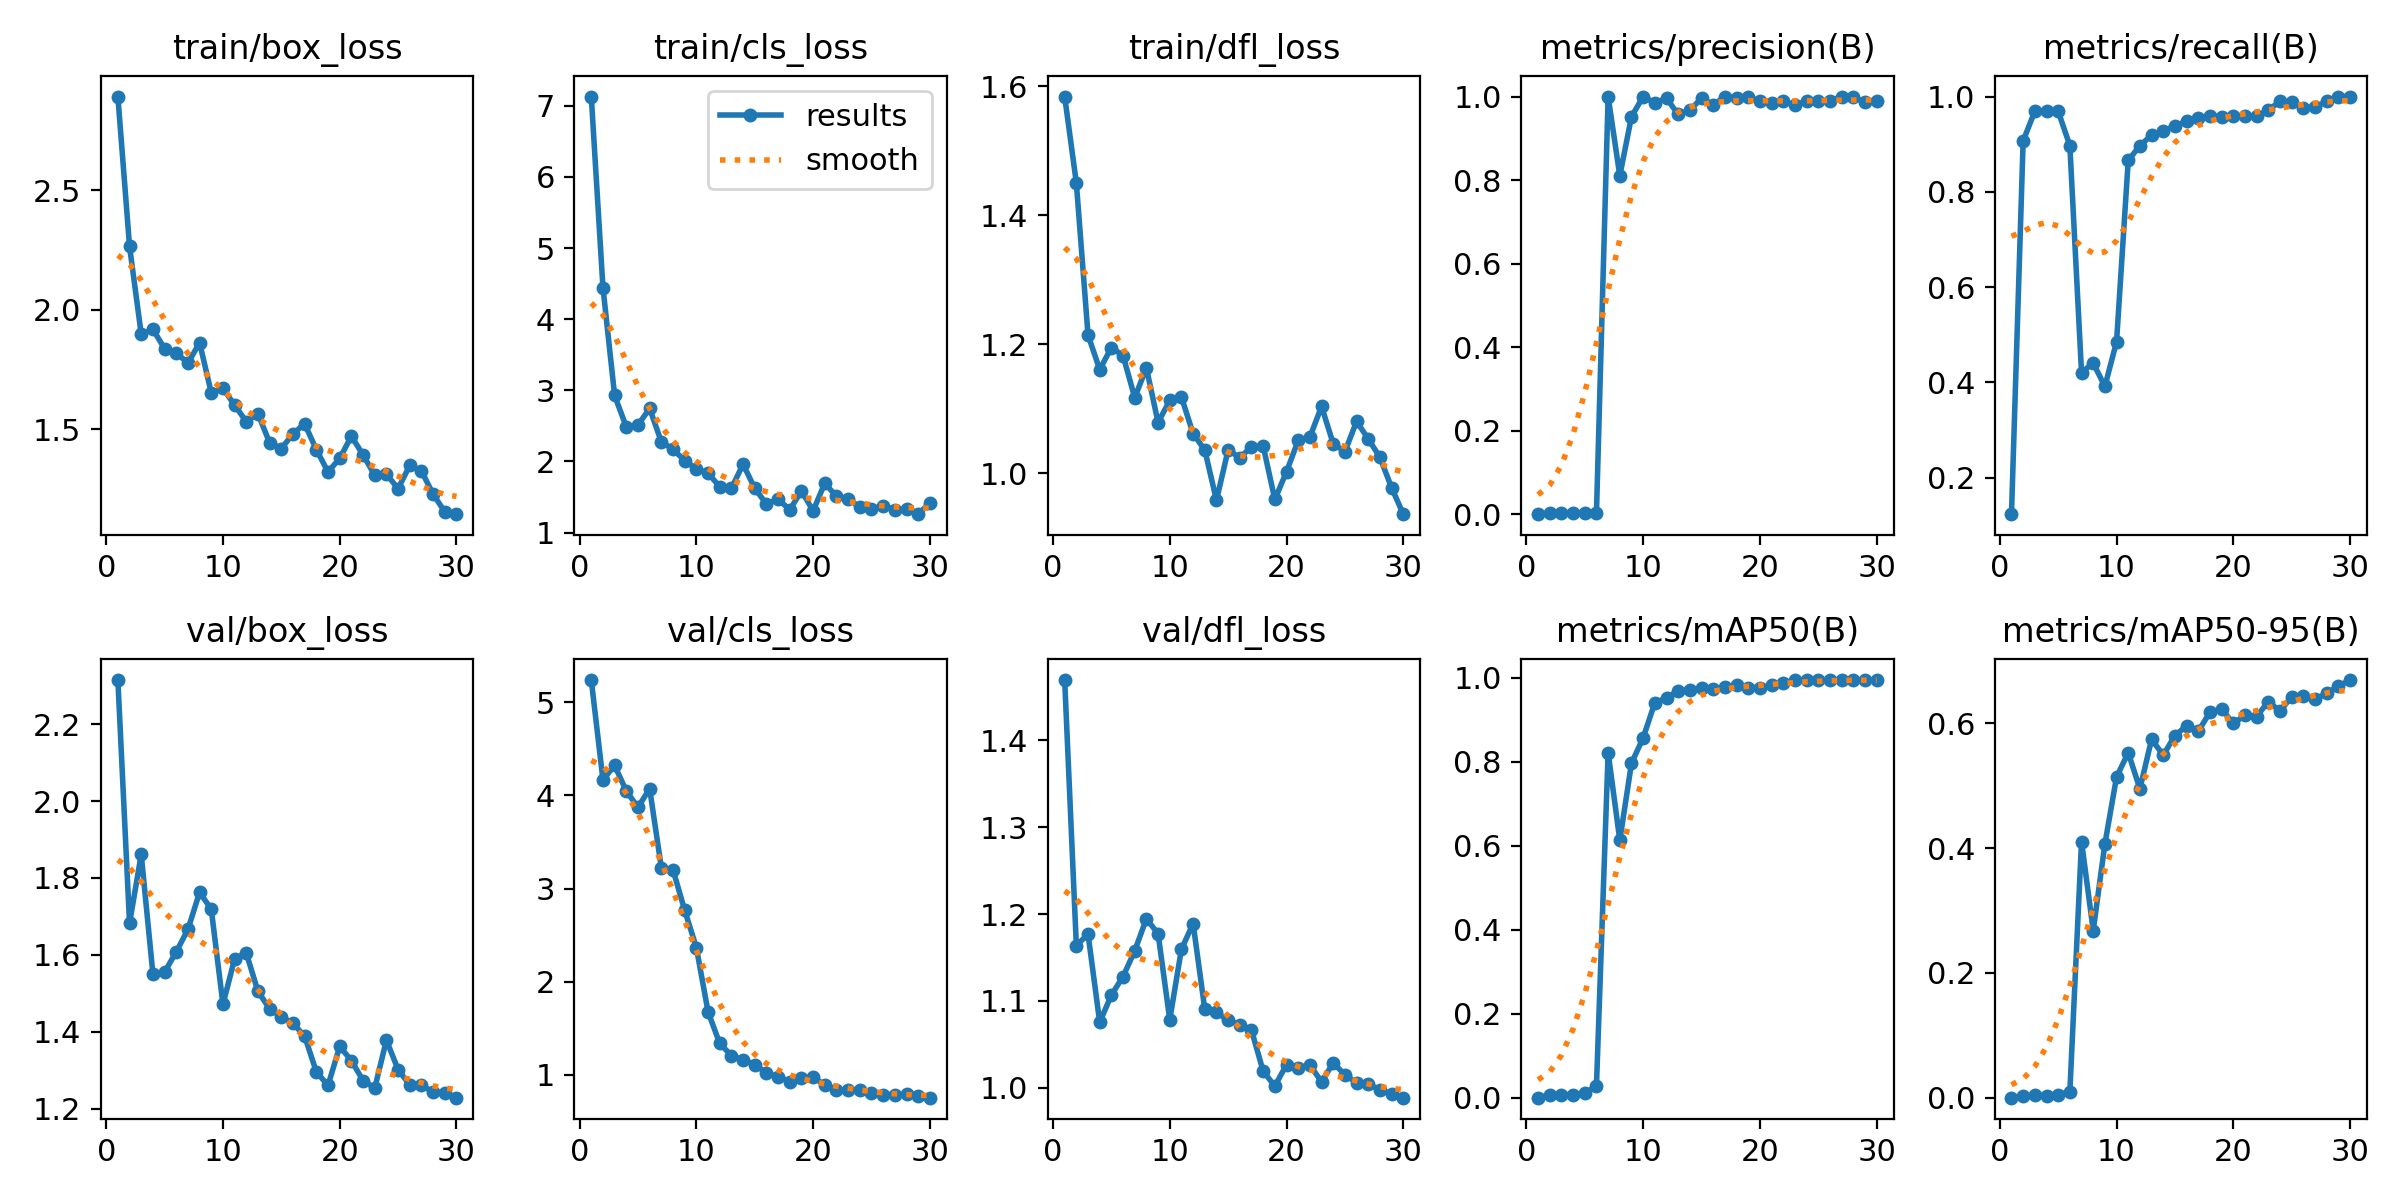

In [35]:
from IPython.display import Image
Image(filename='runs/detect/train8/results.png')


# Tracking - DeepSort

In [42]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/traco_2024/yolov8_model_y.pt")
model.predict("/content/drive/MyDrive/traco_2024/training/training01.mp4", conf=0.05).show()



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/101) /content/drive/MyDrive/traco_2024/training/training01.mp4: 480x640 1 frisbee, 1 sports ball, 1 apple, 1 toilet, 1 mouse, 1 clock, 17.3ms
video 1/1 (frame 2/101) /content/drive/MyDrive/traco_2024/training/training01.mp4: 480x640 1 frisbee, 1 sports ball, 1 apple, 1 mouse, 1 clock, 8.1ms
video 1/1 (frame 3/101) /content/drive/MyDrive/traco_2024/training/training01.mp4: 480x640 1 sports ball, 1 apple, 1 clock, 8.7ms
video 1/1 (fram

AttributeError: 'list' object has no attribute 'show'

In [39]:
# tracking & export for getscore
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2
import os
import csv

# settings
video_paths = [
    # "/content/drive/MyDrive/traco_2024/leaderboard_data/test001.mp4",
    # "/content/drive/MyDrive/traco_2024/leaderboard_data/test002.mp4",
    # "/content/drive/MyDrive/traco_2024/leaderboard_data/test003.mp4",
    # "/content/drive/MyDrive/traco_2024/leaderboard_data/test004.mp4",
    # "/content/drive/MyDrive/traco_2024/leaderboard_data/test005.mp4"
    "/content/drive/MyDrive/traco_2024/trainning/training01.mp4"
]
model_path = "/content/drive/MyDrive/traco_2024/yolov8_model_y.pt"
output_dir = "/content/drive/MyDrive/traco_2024/results_csv"

# DeepSORT initilaizing
tracker = DeepSort(max_age=50)

# YOLOv8 load
model = YOLO(model_path)

# make sure output dic is aiavlable
os.makedirs(output_dir, exist_ok=True)

# process video seperate
for video_path in video_paths:
    cap = cv2.VideoCapture(video_path)
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    csv_path = os.path.join(output_dir, f"{video_name}.csv")
    with open(csv_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["index", "t", "hexbug", "x", "y"])  # CSV-Header

        frame_id = 0
        index = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # YOLOv8 Inferenz
            results = model.predict(source=frame, conf=0.3, iou=0.5, classes=[0], verbose=False)
            detections = results[0].boxes

            print(f"Frame {frame_id}: {len(detections.xyxy) if detections else 0} detections")

            if detections is None or len(detections.xyxy) == 0:
                frame_id += 1
                continue

            # DeepSORT needs [[x1, y1, x2, y2, confidence], ...]
            dets_for_tracker = []
            for box, conf in zip(detections.xyxy.cpu(), detections.conf.cpu()):
                x1, y1, x2, y2 = box.tolist()
                dets_for_tracker.append([[x1, y1, x2, y2], conf.item()])

            # Tracking
            tracks = tracker.update_tracks(dets_for_tracker, frame=frame)

            for track in tracks:
                if not track.is_confirmed():
                    continue
                track_id = track.track_id
                l, t_, r, b = track.to_ltrb()
                x_center = round((l + r) / 2, 2)
                y_center = round((t_ + b) / 2, 2)

                writer.writerow([index, frame_id, track_id, x_center, y_center])
                index += 1

            frame_id += 1

    cap.release()

print("Tracking abgeschlossen. CSV-Dateien im Ordner 'results_csv/' erstellt.")


Tracking abgeschlossen. CSV-Dateien im Ordner 'results_csv/' erstellt.


# Evaluate Score

In [37]:
# get final score and save results
!python /content/drive/MyDrive/traco_2024/get_score.py --result_dir /content/drive/MyDrive/traco_2024/results

Traceback (most recent call last):
  File "/content/drive/MyDrive/traco_2024/get_score.py", line 332, in <module>
    print(f"Score: {get_score_fct(path_pred, path_test, log = True, vid = False)}")
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/traco_2024/get_score.py", line 33, in get_score_fct
    handler = logging.FileHandler(path_to_prediction.replace(".csv", "_log.log"))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 1181, in __init__
    StreamHandler.__init__(self, self._open())
                                 ^^^^^^^^^^^^
  File "/usr/lib/python3.11/logging/__init__.py", line 1213, in _open
    return open_func(self.baseFilename, self.mode,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/uploads/HexTrackers/test003_log.log'
